In [72]:
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os

import scipy.ndimage as ndi
import numpy as np
import nibabel as nib
from nibabel.orientations import axcodes2ornt, ornt_transform, apply_orientation, aff2axcodes


# Dataset Used:

Dataset: BraTS-Africa
Dataset Descriptor: Adewole, M., Rudie, J.D., Gbadamosi, A., Zhang, D., Raymond, C., Ajigbotoshso, J., Toyobo, O., Aguh, K.,
        Omidiji, O., Akinola R., Suwaid, M.A., Emegoakor, A., Ojo, N., Kalaiwo, C., Babatunde, G., Ogunleye, A., Gbadamosi, Y.,
        Iorpagher, K., Onuwaje M., Betiku B., Saluja, R., Menze, B., Baid, U., Bakas, S., Dako, F., Fatade A., Anazodo, U.C. (2024)
        Expanding the Brain Tumor Segmentation (BraTS) data to include African Populations (BraTS-Africa) (version 1) [Dataset]. 
        The Cancer Imaging Archive. https://doi.org/10.7937/v8h6-8×67

Link: https://www.cancerimagingarchive.net/collection/brats-africa/

# 1. Load NIfti Files for all MR Images

In [73]:
#Load NIfti files
T1_S1 = nib.load("//mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-t1n.nii.gz")
T2_S1 = nib.load("/mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-t2w.nii.gz")
T2F_S1 = nib.load("/mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-t2f.nii.gz")
T1Gd_S1 = nib.load("/mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-t1c.nii.gz")
MASK_S1 = nib.load("/mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-seg.nii.gz")


In [74]:
# Convert it into Numpy Array
T1_sub1 = nib.load("//mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-t1n.nii.gz").get_fdata()
T2_sub1 = nib.load("//mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-t2w.nii.gz").get_fdata()
T2F_sub1 = nib.load("//mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-t2f.nii.gz").get_fdata()
T1Gd_sub1 = nib.load("//mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-t1c.nii.gz").get_fdata()
MASK_sub1 = nib.load("//mnt//c//Users//barsa//Documents//95_Glioma//BraTS-SSA-00055-000//BraTS-SSA-00055-000-seg.nii.gz").get_fdata()


In [75]:
# Check shapes(Number of Slices in Sagittal, Coronal and Axial axes)
T1_sub1_shape = T1_sub1.shape
T2_sub1_shape = T2_sub1.shape
T2f_sub1_shape = T2F_sub1.shape
T1Gd_sub1_shape = T1Gd_sub1.shape
MASK_sub1_shape = MASK_sub1.shape

print(T1_sub1_shape, T2_sub1_shape, T2f_sub1_shape , T1Gd_sub1_shape, MASK_sub1_shape)

(240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)


In [76]:
# Check Orientation of the images
affine_t1 = T1_S1.affine
orientation_t1 = aff2axcodes(affine_t1)
affine_t2 = T2_S1.affine
orientation_t2 = aff2axcodes(affine_t2)
affine_t2f = T2F_S1.affine
orientation_t2f = aff2axcodes(affine_t2f)
affine_t1Gd = T1Gd_S1.affine
orientation_t1Gd = aff2axcodes(affine_t1Gd)
affine_MASK = MASK_S1.affine
orientation_MASK = aff2axcodes(affine_MASK)


print(orientation_t1, orientation_t2, orientation_t2f, orientation_t1Gd, orientation_MASK)

('L', 'P', 'S') ('L', 'P', 'S') ('L', 'P', 'S') ('L', 'P', 'S') ('L', 'P', 'S')


# Visulaize the MR Images

In [ ]:
# Coronal Slice of T1
plt.imshow(ndi.rotate(T1_sub1[:,130,:],90), cmap="gray")

In [ ]:
# Axinal Slice of T2
plt.imshow(ndi.rotate(T2_sub1[:,:,75],270), cmap="gray")

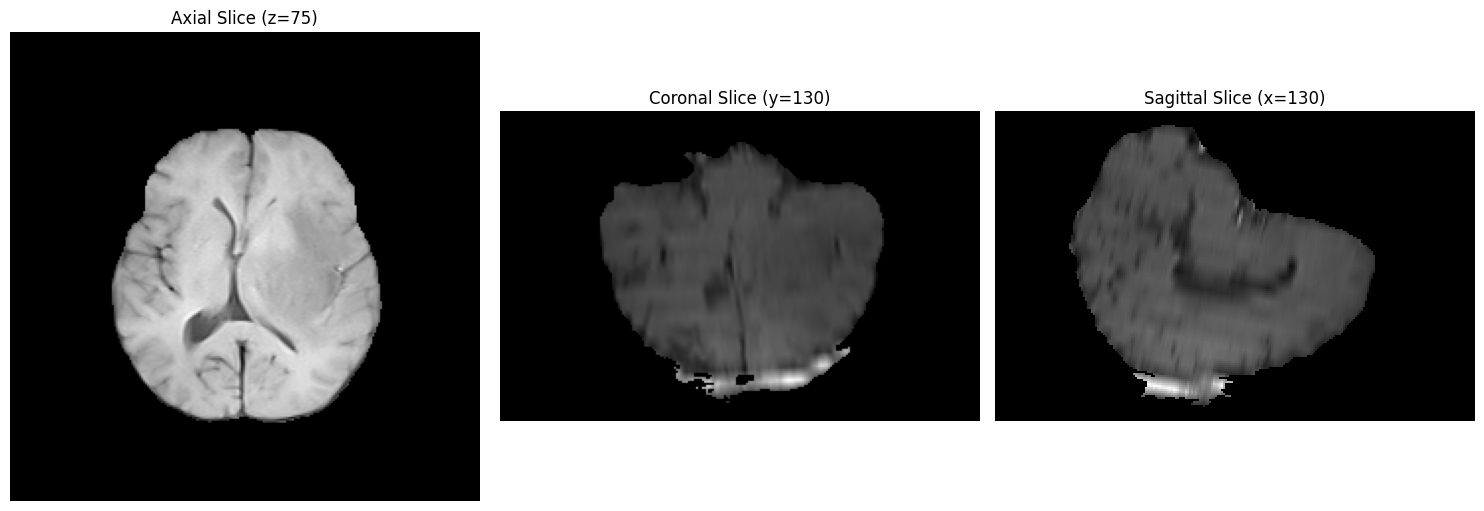

In [79]:
# 180th slice along all the axis for T1

# Axial plane 
axial_slice = ndi.rotate(T1_sub1[:, :, 75], 270)

# Coronal plane 
coronal_slice = ndi.rotate(T1_sub1[:, 130, :], 270)

# Sagittal plane 
sagittal_slice = ndi.rotate(T1_sub1[130, :, :], 270)

# Plot all three slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(axial_slice, cmap="gray")
axes[0].set_title("Axial Slice (z=75)")
axes[0].axis("off")

axes[1].imshow(coronal_slice, cmap="gray")
axes[1].set_title("Coronal Slice (y=130)")
axes[1].axis("off")

axes[2].imshow(sagittal_slice, cmap="gray")
axes[2].set_title("Sagittal Slice (x=130)")
axes[2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# All the slices along the axial plane
fig, ax = plt.subplots(31,5,figsize=(10,60))
ax = ax.flatten()
for i in range(0,155):
    ax[i].imshow(ndi.rotate(T2_sub1[:,:,i],270), cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(i)
    

In [ ]:
# All the slices along the axial plane
fig, ax = plt.subplots(31,5,figsize=(10,60))
ax = ax.flatten()
for i in range(0,155):
    ax[i].imshow(ndi.rotate(MASK_sub1[:,:,i],270), cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(i)
    

# Function to Load and MR Images

In [85]:


def Load_plot_MRImages(Sub, folder, slice_number):    

    # function to load and normalize the subjects
    dir = (f"{folder}/{Sub}")
    os.chdir(dir)
    
    img_name = []
    for k in os.listdir(dir):
        img_dir = os.path.join(dir, k)
        img = nib.load(img_dir).get_fdata()
        img_name.append(k)
    
    # Separate modalities
    T1 = [m for m in img_name if m.endswith("t1n.nii.gz")]
    T2 = [m for m in img_name if m.endswith("t2w.nii.gz")]
    T2f = [m for m in img_name if m.endswith("t2f.nii.gz")]
    T1Gd = [m for m in img_name if m.endswith("t1c.nii.gz")]
    GBM = [m for m in img_name if m.endswith("seg.nii.gz")]

    # Load data
    T1   = nib.load(T1[0]).get_fdata()
    T2   = nib.load(T2[0]).get_fdata()
    T2f  = nib.load(T2f[0]).get_fdata()
    T1GD = nib.load(T1Gd[0]).get_fdata()
    mask = nib.load(GBM[0]).get_fdata()

    # Normalize images for better contrast
    def norm(img):
        return (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-8)

    # Prepare slices
    T1_slice   = ndi.rotate(norm(T1[:, :, slice_number]), 270)
    T2_slice   = ndi.rotate(norm(T2[:, :, slice_number]), 270)
    T2f_slice  = ndi.rotate(norm(T2f[:, :, slice_number]), 270)
    T1GD_slice = ndi.rotate(norm(T1GD[:, :, slice_number]), 270)
    mask_slice = ndi.rotate(mask[:, :, slice_number], 270)

    # Plot
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    modalities = [T1_slice, T2_slice, T2f_slice, T1GD_slice, mask_slice]
    titles = ["T1", "T2", "T2FLAIR", "T1GD", "Mask"]

    for ax, img, title in zip(axes, modalities, titles):
        if title == "Mask":
            ax.imshow(img, cmap="Reds")
        else:
            ax.imshow(img, cmap="gray")
        ax.set_title(title, fontsize=12)
        ax.axis("off")

    plt.suptitle(f"Subject: {Sub} | Slice: {slice_number}", fontsize=14)
    plt.tight_layout()
    plt.show()


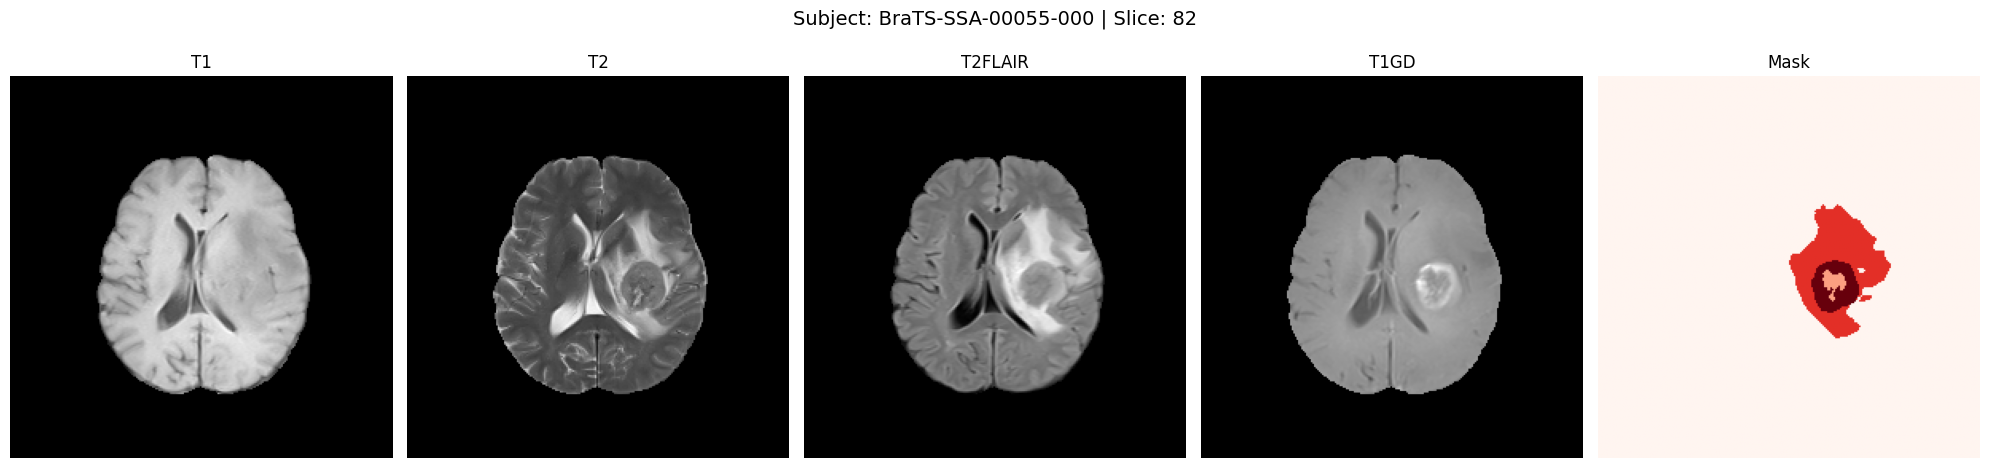

In [88]:
Load_plot_MRImages("BraTS-SSA-00055-000", r"//mnt//c//Users//barsa//Documents//95_Glioma//", 82)


# 2. Isolate Tumor Boundaries with Tumor mask

In [89]:

folder = "//mnt//c//Users//barsa//Documents//95_Glioma//"
Sub = "BraTS-SSA-00055-000"
l_slice = 82
Subject = Sub.lstrip('BraTS-SSA-')

I = []
# function to load and normalize the subjects
Dir = (f"{folder}/{Sub}")

os.chdir(Dir)

img_name = []
for k in os.listdir(Dir):
    img_dir = os.path.join(Dir,k)
    img = nib.load(img_dir).get_fdata()
    img_name.append(k)
    
# print(img.shape)    
# print(img_name)

# to separate t1 files from other
T1_lst = []
for m in img_name:
    if m.endswith("t1n.nii.gz"):
        T1_lst.append(m)

# to separate t2 files from other
T2_lst = []
for m in img_name:
    if m.endswith("t2w.nii.gz"):
        T2_lst.append(m)

# to separate t2f files from other
T2f_lst = []
for m in img_name:
    if m.endswith("t2f.nii.gz"):
        T2f_lst.append(m)

# to separate t1 files from other

T1Gd_lst = []
for n in img_name:
    if n.endswith("t1c.nii.gz"):
        T1Gd_lst.append(n)

GBM_lst = []
for o in img_name:
    if o.endswith("seg.nii.gz"):
        GBM_lst.append(o)
        
T1   = nib.load(T1_lst[0]).get_fdata()
T2   = nib.load(T2_lst[0]).get_fdata()
T2f  = nib.load(T2f_lst[0]).get_fdata()
T1GD = nib.load(T1Gd_lst[0]).get_fdata()
mask = nib.load(GBM_lst[0]).get_fdata()


T1 = (T1-np.min(T1))/(np.max(T1)-np.min(T1))
T2 = (T2-np.min(T2))/(np.max(T2)-np.min(T2))
T2f = (T2f-np.min(T2f))/(np.max(T2f)-np.min(T2f))
T1GD = (T1GD-np.min(T1GD))/(np.max(T1GD)-np.min(T1GD))

T1 = np.nan_to_num(T1)
T2 = np.nan_to_num(T2)
T2f = np.nan_to_num(T2f)
T1GD = np.nan_to_num(T1GD)

fl_T1 =  T1_lst[0]
fl_T2 =  T2_lst[0]
fl_T2f =  T2f_lst[0]
fl_T1Gd =  T1Gd_lst[0]

region_name = ['enhancing', 'nonenhancing', 'edema']
# path = f'/home/barsa/Brain_MRI/TCGA-GBM/tumormask_MS/HGG_{Subject}'
def generate_mask(mask):
    
    m = len(mask)
    n = len(mask[0])
    X = np.zeros((m,n, 3))
 
    for i in range(len(mask)):
        for j in range(len(mask[i])):
            if mask[i,j] == 4:       #enhancing
                X[i,j] = [0,0,255]
            if mask[i,j] == 1:       #non enhancing
                X[i,j] = [255,0,0]
            if mask[i,j] == 2:       #edema  
                X[i,j] =[0,255,0]
        
        
    return X

mask = fl_T1.replace('t1n.nii.gz', 'seg.nii.gz') 
mask = nib.load(mask.rstrip()).get_fdata()
x = mask[:,:,l_slice].astype(np.uint8)  #change here
T1_img = nib.load(fl_T1.rstrip()).get_fdata()
T2_img = nib.load(fl_T2.rstrip()).get_fdata()
T2f_img = nib.load(fl_T2f.rstrip()).get_fdata()
T1Gd_img = nib.load(fl_T1Gd.rstrip()).get_fdata()

In [90]:
fl_T1

'BraTS-SSA-00055-000-t1n.nii.gz'

In [ ]:
plt.axis('off')
plt.imshow(ndi.rotate(T1_img[:,:,l_slice], 270), cmap = 'gray')
plt.imshow(generate_mask(ndi.rotate(x,270)),alpha=0.4)
# plt.savefig(path + 'maskwtout_T1.tiff', dpi = 600)

In [ ]:
plt.axis('off')
plt.imshow(ndi.rotate(T2_img[:,:,l_slice], 270), cmap = 'gray')
plt.imshow(generate_mask(ndi.rotate(x,270)),alpha=0.4)
# plt.savefig(path + 'maskwtout_T1.tiff', dpi = 600)

In [ ]:
plt.axis('off')
plt.imshow(ndi.rotate(T2f_img[:,:,l_slice], 270), cmap = 'gray')
plt.imshow(generate_mask(ndi.rotate(x,270)),alpha=0.4)
# plt.savefig(path + 'maskwtout_T1.tiff', dpi = 600)

In [ ]:
plt.axis('off')
plt.imshow(ndi.rotate(T1Gd_img[:,:,l_slice], 270), cmap = 'gray')
plt.imshow(generate_mask(ndi.rotate(x,270)),alpha=0.4)
# plt.savefig(path + 'maskwtout_T1.tiff', dpi = 600)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

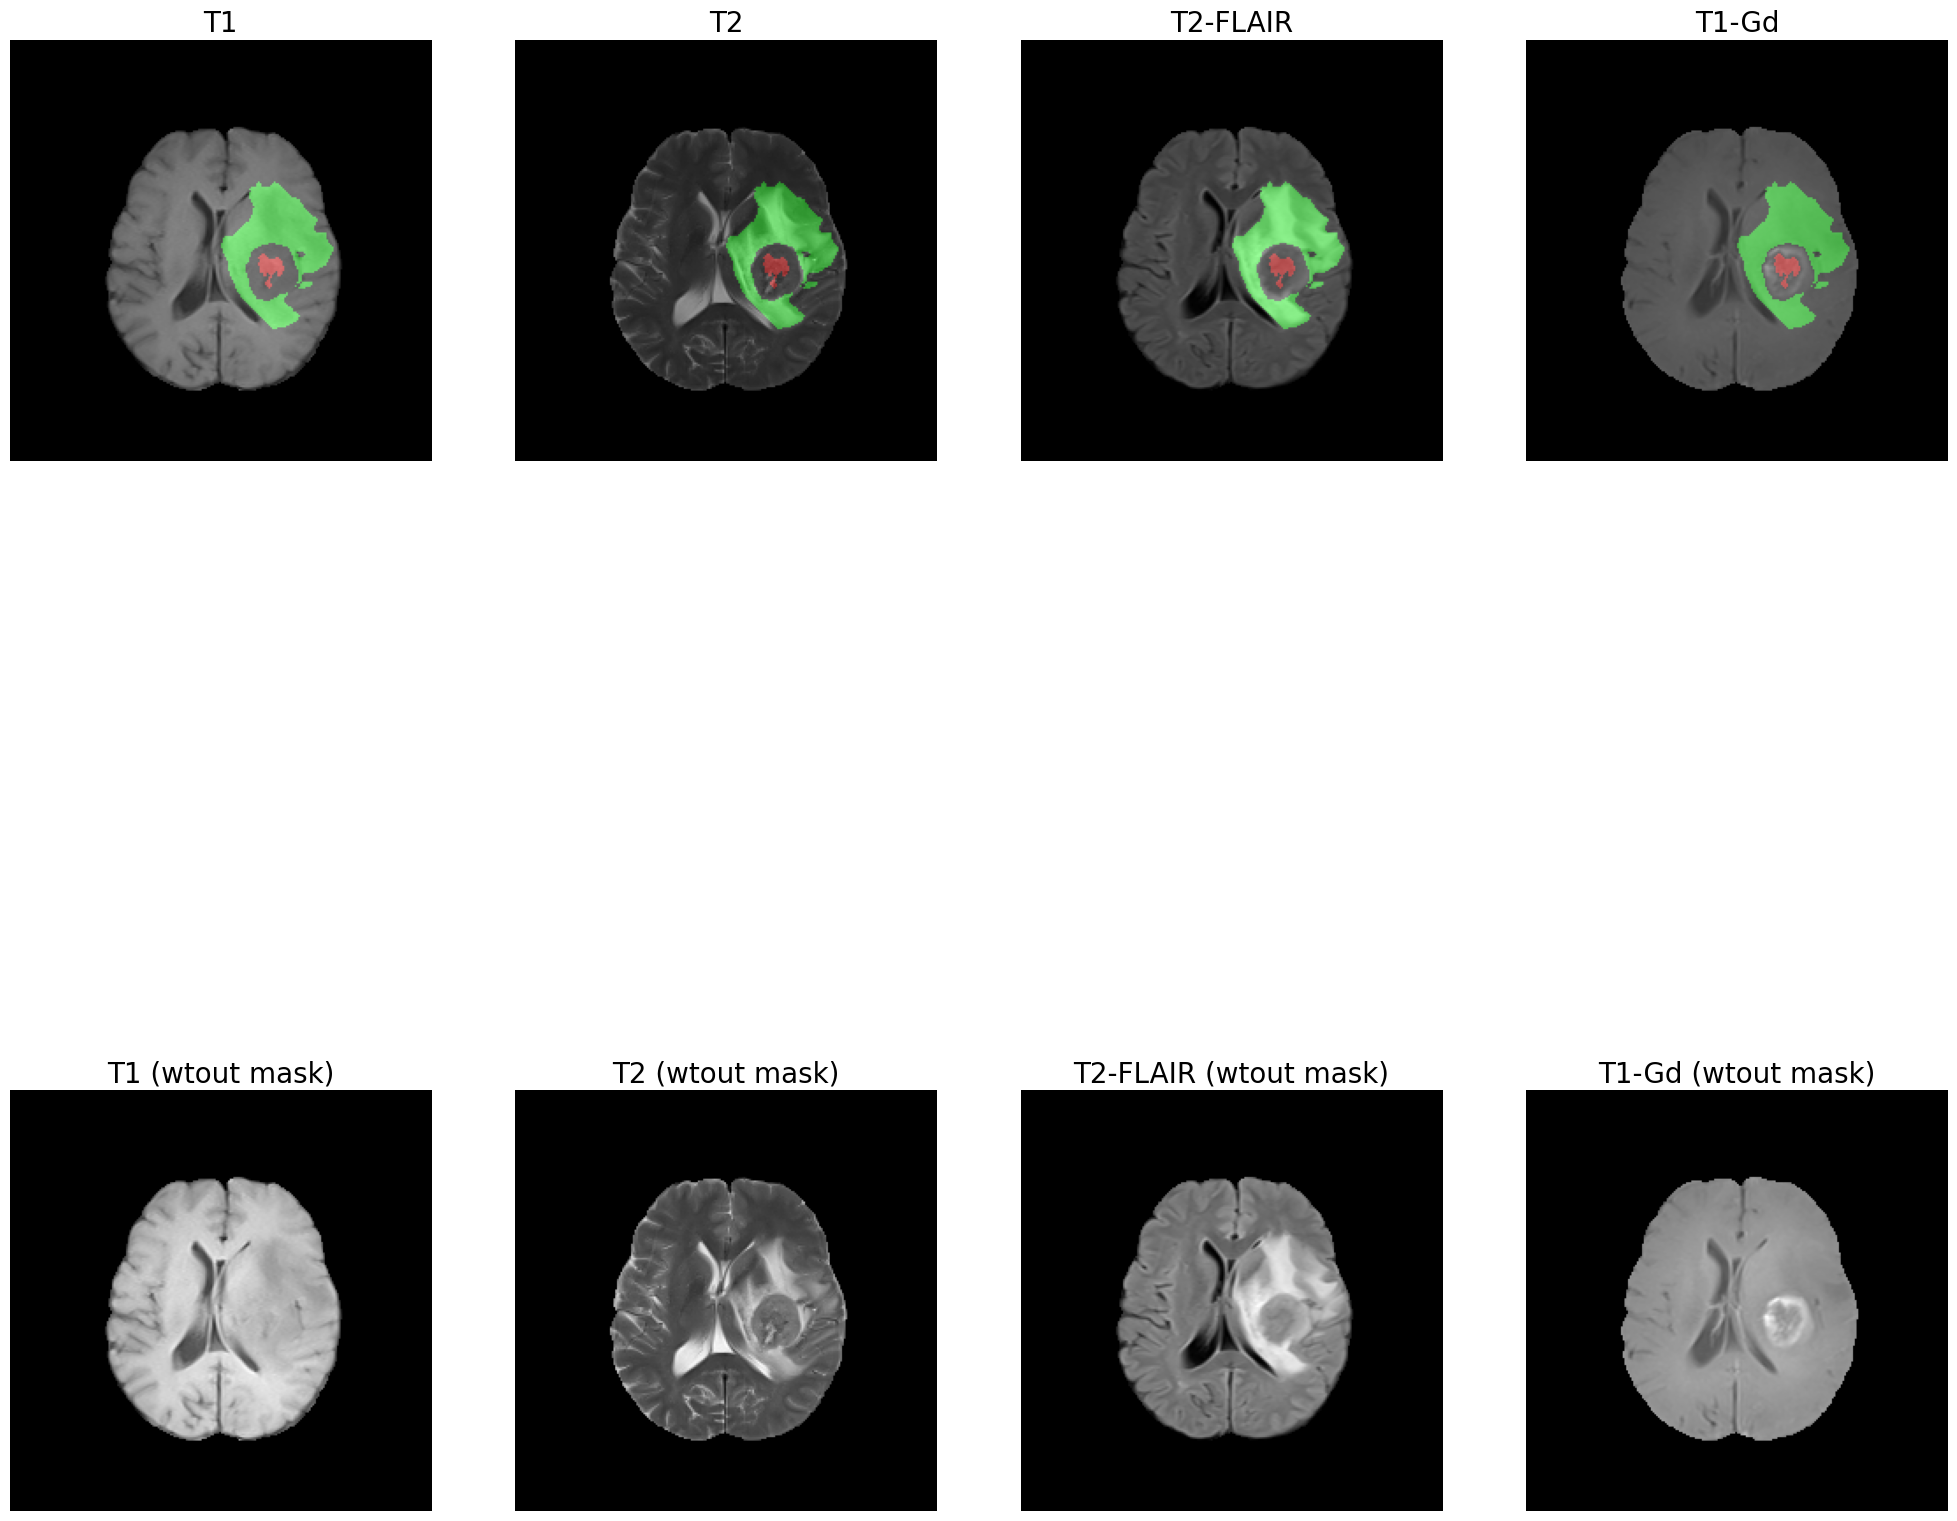

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(25,25))
#fig, ax = plt.subplots(2, 2)


#plt.figure(figsize=(30,30))
# Show an image in each subplot
ax[0,0].imshow(ndi.rotate(T1_img[:,:,l_slice], 270), cmap = "gray") #row=0, col=0
ax[0,0].imshow(generate_mask(ndi.rotate(x,270)),alpha=0.4)
ax[0,0].set_title('T1', fontsize = 20)
ax[0,0].axis('off')
ax[0,1].imshow(ndi.rotate(T2_img[:,:,l_slice], 270), cmap = 'gray') #row=1, col=0
ax[0,1].imshow(generate_mask(ndi.rotate(x,270)),alpha=0.4)
ax[0,1].set_title('T2', fontsize = 20)
ax[0,1].axis('off')
ax[0,2].imshow(ndi.rotate(T2f_img[:,:,l_slice],270), cmap = "gray") #row=1, col=0
ax[0,2].imshow(generate_mask(ndi.rotate(x,270)),alpha=0.4)
ax[0,2].set_title('T2-FLAIR', fontsize = 20)
ax[0,2].axis('off')
ax[0,3].imshow(ndi.rotate(T1Gd_img[:,:,l_slice],270), cmap = "gray") #row=1, col=0
ax[0,3].imshow(generate_mask(ndi.rotate(x,270)),alpha=0.4)
ax[0,3].set_title('T1-Gd', fontsize = 20)
ax[0,3].axis('off')
ax[1,0].imshow(ndi.rotate(T1_img[:,:,l_slice], 270), cmap = "gray") #row=0, col=0
ax[1,0].set_title('T1 (wtout mask)', fontsize = 20)
ax[1,0].axis('off')
ax[1,1].imshow(ndi.rotate(T2_img[:,:,l_slice], 270), cmap = 'gray') #row=1, col=0
ax[1,1].set_title('T2 (wtout mask)', fontsize = 20)
ax[1,1].axis('off')
ax[1,2].imshow(ndi.rotate(T2f_img[:,:,l_slice],270), cmap = "gray") #row=1, col=0
ax[1,2].set_title('T2-FLAIR (wtout mask)', fontsize = 20)
ax[1,2].axis('off')
ax[1,3].imshow(ndi.rotate(T1Gd_img[:,:,l_slice],270), cmap = "gray") #row=1, col=0
ax[1,3].set_title('T1-Gd (wtout mask)', fontsize = 20)
ax[1,3].axis('off')

# 3. Calculate Tumore Area, Slice with tumor of largest area and its coordinates

In [96]:
# For searching files ending with specific filenames

root_directory = r"//mnt//c//Users//barsa//Documents//95_Glioma//"
file_pattern = 'seg.nii.gz' #query

mask_file_paths = []


for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith(file_pattern):
            mask_file_paths.append(os.path.join(root, file))

In [106]:
Tumor_details = []

In [107]:


newid = []
IDs = []
s_ID = []

# Initialize an empty DataFrame with the desired columns
combined_df = []
    
l_slice = []    
DF_slices = []
for i in mask_file_paths[0:10]:

    n_files = i.lstrip(r"//mnt//c//Users//barsa//Documents//95_Glioma//")  ####strips off prefix
    nfiles = n_files.rstrip('seg.nii.gz' )                     ####strips off suffix
    newid.append(nfiles)
    for j in newid:
        nfiles = j.split("//")                  ######splits a list or an element based on _ on that list
        IDs.append(nfiles)
    for k in IDs:
        nIDs = k[-1]
        s_ID.append(nIDs)
    sub = nib.load(i).get_fdata()
    a_L= []
    a_R= []
    for k in range(0,240):

        x = sub[:,k,:]

        if np.sum(x.ravel()   > 0) :#+ np.sum(x.ravel() == 53) > 0
            a_L.append(k)
    # area = []
    # Slice = []
    for slice in a_L:
        area = []
        Slice = []
        A = sub[:,slice,:]
        contours = find_cont(A)
        xx,yy,w,h = cv2.boundingRect(contours[0])
        cropped_r = A[yy:yy+h, xx:xx+w]
        areas = h*w
        area.append(areas)
        Slice.append(slice)
        data = {'Sub': nIDs, 'Slice': Slice, 'Area' : area, 'X' : xx, 'Y' : yy, 'H' : h, 'W' : w }
        df = pd.DataFrame(data)
        DF_slices.append(df)
        DF = pd.concat(DF_slices, ignore_index=True)
        # Find the index of the row with the maximum 'Area'
        max_area_index = DF['Area'].idxmax()
        # Retrieve the row with the maximum 'Area'
        max_area_row = DF.loc[max_area_index]
        # Convert Series to DataFrame and transpose
        new_series_df = max_area_row.to_frame().T
        # # Concatenate Series to DataFrame
        # df = pd.concat([df, new_series_df], ignore_index=True)
        FDcsv.append(areas)
        L_slice = np.max(FDcsv)
        l_slice.append(L_slice)
    
        
    Tumor_details.append(new_series_df)

In [108]:
Tumor_details

[                                         Sub Slice  Area   X    Y   H   W
 61  BraTS-SSA-00002-000/BraTS-SSA-00002-000-   112  4524  59  108  58  78,
                                           Sub Slice  Area   X   Y   H   W
 185  BraTS-SSA-00007-000/BraTS-SSA-00007-000-   136  7396  48  65  86  86,
                                           Sub Slice  Area   X   Y   H   W
 185  BraTS-SSA-00007-000/BraTS-SSA-00007-000-   136  7396  48  65  86  86,
                                           Sub Slice  Area   X   Y   H   W
 185  BraTS-SSA-00007-000/BraTS-SSA-00007-000-   136  7396  48  65  86  86,
                                           Sub Slice  Area   X   Y   H   W
 185  BraTS-SSA-00007-000/BraTS-SSA-00007-000-   136  7396  48  65  86  86,
                                           Sub Slice  Area   X   Y   H   W
 185  BraTS-SSA-00007-000/BraTS-SSA-00007-000-   136  7396  48  65  86  86,
                                           Sub Slice  Area   X   Y   H   W
 185  BraTS-SSA-000

In [109]:
Tumor_details_df = pd.concat(Tumor_details)
Tumor_df = Tumor_details_df.drop_duplicates()
Tumor_df

,Sub,Slice,Area,X,Y,H,W
61,BraTS-SSA-00002-000/BraTS-SSA-00002-000-,112,4524,59,108,58,78
185,BraTS-SSA-00007-000/BraTS-SSA-00007-000-,136,7396,48,65,86,86
758,BraTS-SSA-00015-000/BraTS-SSA-00015-000-,121,7921,51,59,89,89
876,BraTS-SSA-00025-000/BraTS-SSA-00025-000-,87,8245,0,78,85,97
